In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import lightgbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


In [21]:
# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
print("dataset shape: ", vote_df.shape)
vote_df.sample(10)

dataset shape:  (36425, 78)


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
9929,26955,1.0,381,3.0,13900,4.0,182,1.0,607,1.0,1567,1.0,1895,3.0,962,3.0,1616,1.0,17142,4.0,968,2.0,2439,5.0,2165,5.0,717,1.0,10346,5.0,973,4.0,1183,2.0,646,1.0,8586,4.0,1300,5.0,457,10s,3,1,3,Male,1,1,White,Christian_Other,0,0,0,2,1,5,5,6,4,6,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
19039,5898,1.0,549,5.0,971,3.0,839,1.0,946,1.0,958,5.0,1086,1.0,499,3.0,2111,1.0,1810,3.0,1434,3.0,702,5.0,2274,3.0,1930,1.0,1192,3.0,885,3.0,944,1.0,1192,1.0,808,4.0,1099,5.0,1014,10s,3,1,1,Male,1,1,Asian,Atheist,5,3,1,3,3,0,2,1,1,3,3,1,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,1
34222,44147,2.0,954,4.0,1559,2.0,6230,2.0,1487,3.0,2197,2.0,2494,4.0,2121,3.0,2576,4.0,4362,4.0,2485,5.0,2007,5.0,4725,4.0,1192,2.0,1652,2.0,4838,4.0,4531,4.0,1582,2.0,3402,4.0,2474,4.0,1638,50s,3,1,4,Female,2,2,White,Christian_Protestant,4,5,4,4,4,2,0,1,1,5,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
31597,14242,4.0,112,2.0,1016,3.0,1007,1.0,910,1.0,554,3.0,956,5.0,332,5.0,1439,4.0,821,5.0,997,5.0,1368,5.0,1310,2.0,567,4.0,328,4.0,1012,4.0,524,5.0,436,5.0,515,5.0,470,4.0,1100,30s,2,1,1,Male,3,1,White,Buddhist,1,3,0,6,0,4,1,2,1,6,3,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
21267,29834,1.0,444,3.0,3953,5.0,939,1.0,717,4.0,2027,4.0,5511,2.0,1123,3.0,5809,5.0,1648,4.0,3117,5.0,899,5.0,1255,4.0,28172,5.0,2124,1.0,748,5.0,2648,4.0,751,2.0,19372,1.0,799,1.0,1277,30s,3,1,2,Male,1,1,Black,Atheist,5,0,1,5,1,0,1,1,4,5,2,0,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,1
4771,22906,2.0,1067,2.0,1397,2.0,1130,2.0,1751,2.0,885,2.0,681,1.0,919,4.0,1230,2.0,1885,4.0,1045,5.0,910,4.0,1002,2.0,578,2.0,691,5.0,563,5.0,681,3.0,1019,3.0,1701,5.0,364,2.0,654,20s,4,1,1,Female,1,1,White,Christian_Protestant,1,2,2,1,0,6,0,6,2,4,2,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1
21825,23527,2.0,1134,1.0,1334,5.0,724,1.0,924,2.0,1659,1.0,597,2.0,1212,1.0,1179,2.0,2053,3.0,1661,5.0,1508,4.0,1449,5.0,801,4.0,770,5.0,1258,1.0,865,3.0,1431,5.0,673,4.0,1056,5.0,1220,30s,3,2,3,Female,1,1,White,Christian_Catholic,2,6,1,2,1,2,1,3,4,6,3,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1
18394,12790,1.0,363,1.0,7464,5.0,2730,1.0,1409,5.0,951,2.0,987,1.0,1683,1.0,1528,1.0,10925,5.0,2019,2.0,1925,5.0,1331,5.0,892,1.0,2548,5.0,789,5.0,913,5.0,546,5.0,1236,5.0,402,5.0,917,30s,4,2,9,Female,1,1,Asian,Christian_Other,1,2,0,3,0,3,1,2,2,2,2,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1
34071,9816,4.0,553,1.0,1172,4.0,798,3.0,1217,3.0,997,2.0,424,3.0,212,3.0,1278,4.0,3885,4.0,2198,5.0,1130,4.0,2479,2.0,663,4.0,500,2.0,498,3.0,1140,4.0,326,4.0,1074,2.0,912,3.0,729,20s,4,2,5,Female,2,1,Asian,Muslim,4,2,3,2,2,3,2,2,2,4,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
0,43375,1.0,324,5.0,1067,5.0,359,1.0,709,1.0,742,1.0,330,5.0,541,5.0,1376,2.0,1397,5.0,1250,2.0,762,5.0,517,4.0,3614,1.0,521,5.0,705,4.0,633,1.0,330,1.0,512,5.0,347,5.0,588,20s,3,1,2,Male,1,1,White,Christian_Catholic,2,2,1,5,2,4,5,4,1,2,2,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1


In [23]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36425 entries, 0 to 36424
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       36425 non-null  int64  
 1   QaA         36425 non-null  float64
 2   QaE         36425 non-null  int64  
 3   QbA         36425 non-null  float64
 4   QbE         36425 non-null  int64  
 5   QcA         36425 non-null  float64
 6   QcE         36425 non-null  int64  
 7   QdA         36425 non-null  float64
 8   QdE         36425 non-null  int64  
 9   QeA         36425 non-null  float64
 10  QeE         36425 non-null  int64  
 11  QfA         36425 non-null  float64
 12  QfE         36425 non-null  int64  
 13  QgA         36425 non-null  float64
 14  QgE         36425 non-null  int64  
 15  QhA         36425 non-null  float64
 16  QhE         36425 non-null  int64  
 17  QiA         36425 non-null  float64
 18  QiE         36425 non-null  int64  
 19  QjA         36425 non-nul

In [24]:
vote_df.describe()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,3.642500e+04,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.00000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000,36425.000000
mean,22740.586520,2.131942,9.392264e+02,2.897598,2.053925e+03,3.661414,1461.583775,1.750748,1.499025e+03,2.320494,1.897114e+03,2.167742,1.911749e+03,2.560220,1.287380e+03,2.316047,2.243674e+03,3.166699,3.508262e+03,3.574084,2.647131e+03,3.822704,1.910627e+03,4.330734,4.253209e+03,3.509979,1.665842e+03,2.635772,956.472258,3.213672,1410.536884,3.067756,1.632666e+03,2.842169,1.114106e+03,2.827948,2.632989e+03,3.431187,1.163574e+03,3.224104,2.059381e+03,2.548250,1.272752,2.621002,1.170487,1.387975,3.018174,2.61930,1.755717,3.025614,1.333342,2.462759,2.022704,3.509952,2.272340,4.317968,2.179574,0.453178,0.080494,0.163294,0.118600,0.709623,0.934468,0.208730,0.868717,0.895072,0.329087,0.938888,0.971613,0.202663,0.945532,0.393988,0.947536,0.926781
std,13118.110333,1.199763,1.372469e+04,1.568342,1.984665e+04,1.431303,8097.443081,1.046655,1.109992e+04,1.370584,1.508537e+04,1.349821,8.217648e+04,1.509689,9.914887e+03,1.460773,1.373760e+04,1.482101,9.409606e+04,1.360288,6.022463e+04,1.368946,2.086329e+04,1.144399,4.095916e+05,1.375125,2.834511e+04,1.475278,5753.950736,1.478189,8745.676887,1.492889,2.626450e+04,1.405662,2.285452e+04,1.426399,1.657403e+05,1.374757,7.501528e+03,1.522649,4.413002e+04,0.941273,0.449247,5.438894,0.468163,0.640297,2.005182,1.89422,1.676886,2.036558,1.451165,1.998749,1.779602,1.971593,1.845983,1.724866,0.761658,0.497810,0.272060,0.369639,0.323322,0.453943,0.247465,0.406407,0.337715,0.306465,0.469888,0.239539,0.166078,0.401989,0.226942,0.488639,0.222964,0.260499
min,0.000000,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11403.000000,1.000000,4.040000e+02,1.000000,8.760000e+02,2.000000,651.000000,1.000000,6.810000e+02,1.000000,8.360000e+02,1.000000,5.050000e+02,1.000000,5.490000e+02,1.000000,1.081000e+03,2.000000,1.257000e+03,2.000000,9.040000e+02,3.000000,8.600000e+02,4.000000,8.060000e+02,2.000000,6.510000e+02,1.000000,430.000000,2.000000,638.000000,2.000000,7.050000e+02,2.000000,4.620000e+02,2.000000,7.950000e+02,2.000000,5.290000e+0

In [25]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 결손값 처리

In [26]:
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

In [27]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']

# 전체 데이터 건수
total_count = vote_df['education'].count()

# 질문을 답할 때까지의 시간
for i in range(97, 117):
    s = 'Q' + chr(i) + 'E'
    zero_features.append(s)

# tp
tp_features = []
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    zero_features.append(s)
    
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

### 이상값 처리

In [28]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df["voted"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [29]:
#Q_E 시간
Q_E = []
for i in range(97, 117):
    a = 'Q' + chr(i) + 'E'
    Q_E.append(a)

#시간에 대해 이상치 데이터 인덱스 확인 및 제거 - ?
for feature in Q_E:
    outlier_index = get_outlier(df=vote_df, column=feature, weight=1.5)
    print('이상치 데이터 인덱스 :', outlier_index)
    print("이상치 데이터 인덱스 개수:", len(outlier_index))
    vote_df.drop(outlier_index, axis=0, inplace=True)


이상치 데이터 인덱스 : Int64Index([   21,    31,    77,   110,   124,   134,   214,   243,   253,
              267,
            ...
            36149, 36179, 36205, 36206, 36220, 36221, 36252, 36350, 36363,
            36373],
           dtype='int64', length=1193)
이상치 데이터 인덱스 개수: 1193
이상치 데이터 인덱스 : Int64Index([   43,    90,   143,   182,   190,   199,   250,   263,   302,
              312,
            ...
            36204, 36254, 36267, 36274, 36306, 36320, 36322, 36336, 36364,
            36387],
           dtype='int64', length=1171)
이상치 데이터 인덱스 개수: 1171
이상치 데이터 인덱스 : Int64Index([   35,    49,    94,    96,   101,   111,   114,   131,   171,
              270,
            ...
            36237, 36280, 36290, 36295, 36304, 36315, 36325, 36358, 36365,
            36375],
           dtype='int64', length=1068)
이상치 데이터 인덱스 개수: 1068
이상치 데이터 인덱스 : Int64Index([    9,    27,    33,    66,   258,   266,   274,   394,   400,
              422,
            ...
            35965, 36184, 36224, 36235,

### 데이터 변환

In [30]:
# 레이블 인코딩 적용 : age_group
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

In [31]:
def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7
    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

In [32]:
#원핫인코딩 진행
dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
for column in dummy_columns:
    vote_df = pd.get_dummies(data = vote_df, columns = [column], prefix=column)

# 모델 학습

In [33]:
# X_features, y_labels 설정
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
print("피처 데이터 shape:{0}".format(X_features.shape))

피처 데이터 shape:(24623, 105)


In [34]:
# Standard Scaler 적용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
vote_scaled = scaler.fit_transform(X_features)

X_features = pd.DataFrame(data=vote_scaled, columns=X_features.columns.values.tolist())

In [35]:
# train and test data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)
train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape:{0}, 테스트 세트 Shape:{1}".format(X_train.shape, X_test.shape))

print(" 학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(19698, 105), 테스트 세트 Shape:(4925, 105)
 학습 세트 레이블 값 분포 비율
0    0.810235
1    0.189765
Name: voted, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.803655
1    0.196345
Name: voted, dtype: float64


### SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print()
print('SMOTE 적용 후 레이블 값 분포:')
print(y_train_over.value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (19698, 105) (19698,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (31920, 105) (31920,)

SMOTE 적용 후 레이블 값 분포:
1    15960
0    15960
Name: voted, dtype: int64


In [40]:
from sklearn.model_selection import GridSearchCV

# max_depth 와 min_child_weight 튜닝
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
                                                  n_estimators=400, 
                                                  max_depth=5, 
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=-1, 
                                                  scale_pos_weight=1, seed=2019),
param_grid = param_test1, scoring='f1',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 10.6min remaining:   29.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.1min finished
C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([25.38956475, 26.16622367, 29.49465089, 59.85613823, 53.98203959,
         59.52680111, 80.63743935, 93.66640925, 82.08570757]),
  'std_fit_time': array([ 0.27389872,  0.69143745,  2.1273414 ,  4.89297001,  6.82974716,
          5.18854311,  5.84915544,  2.67971593, 17.38307651]),
  'mean_score_time': array([0.07931929, 0.08308358, 0.09990206, 0.16784883, 0.18767066,
         0.18627477, 0.27953153, 0.29993358, 0.2456089 ]),
  'std_score_time': array([0.014301  , 0.00732608, 0.00804778, 0.00782322, 0.0278989 ,
         0.03791112, 0.0376735 , 0.03718202, 0.06195507]),
  'param_max_depth': masked_array(data=[3, 3, 3, 6, 6, 6, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
                    

In [ ]:
# Gamma 튜닝
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test2, scoring='f1', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
# subsample 과 colsample_bytree 튜닝
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test3, scoring='f1', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
# subsample 추가 튜닝
param_test4 = {
 'subsample':[i/100.0 for i in range(40,80)],
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  reg_alpha=1e-05,
                                                  subsample=0.8, 
                                                  colsample_bytree=0.6,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test4, scoring='f1', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch4.fit(X_train, y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
# Regularization Parameter 튜닝
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.6,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test5, scoring='f1', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch5.fit(X_train, y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

### xgb

In [18]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_model = XGBClassifier(
    learning_rate =0.1, # 0.01
    n_estimators=1000,
    max_depth=3,
    min_child_weight=5,
    gamma=0,
    reg_alpha=1e-05,
    subsample=0.77,
    colsample_bytree=0.6,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    seed=2019,
    random_state=156
)

# xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", min_child_weight=3, colsample_bytree=0.5, random_state=156)
xgb_model.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.660015
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.631625
[2]	validation_0-logloss:0.60864
[3]	validation_0-logloss:0.585243
[4]	validation_0-logloss:0.568154
[5]	validation_0-logloss:0.550744
[6]	validation_0-logloss:0.537866
[7]	validation_0-logloss:0.528248
[8]	validation_0-logloss:0.519032
[9]	validation_0-logloss:0.507647
[10]	validation_0-logloss:0.497924
[11]	validation_0-logloss:0.489084
[12]	validation_0-logloss:0.481643
[13]	validation_0-logloss:0.474823
[14]	validation_0-logloss:0.468812
[15]	validation_0-logloss:0.46266
[16]	validation_0-logloss:0.45629
[17]	validation_0-logloss:0.450482
[18]	validation_0-logloss:0.445288
[19]	validation_0-logloss:0.440854
[20]	validation_0-logloss:0.436361
[21]	validation_0-logloss:0.431141
[22]	validation_0-logloss:0.426819
[23]	validation_0-logloss:0.423241
[24]	validation_0-logloss:0.419161
[25]	validation_0-logloss:0.415478
[26]	validation_0-logloss:0.411746

[230]	validation_0-logloss:0.26782
[231]	validation_0-logloss:0.267683
[232]	validation_0-logloss:0.267624
[233]	validation_0-logloss:0.267478
[234]	validation_0-logloss:0.267365
[235]	validation_0-logloss:0.267346
[236]	validation_0-logloss:0.267186
[237]	validation_0-logloss:0.267129
[238]	validation_0-logloss:0.266983
[239]	validation_0-logloss:0.266885
[240]	validation_0-logloss:0.266742
[241]	validation_0-logloss:0.266531
[242]	validation_0-logloss:0.266544
[243]	validation_0-logloss:0.266304
[244]	validation_0-logloss:0.266259
[245]	validation_0-logloss:0.266175
[246]	validation_0-logloss:0.266055
[247]	validation_0-logloss:0.265976
[248]	validation_0-logloss:0.265981
[249]	validation_0-logloss:0.265952
[250]	validation_0-logloss:0.265871
[251]	validation_0-logloss:0.265744
[252]	validation_0-logloss:0.265685
[253]	validation_0-logloss:0.265701
[254]	validation_0-logloss:0.265656
[255]	validation_0-logloss:0.265806
[256]	validation_0-logloss:0.265667
[257]	validation_0-logloss:0.

[459]	validation_0-logloss:0.260656
[460]	validation_0-logloss:0.260716
[461]	validation_0-logloss:0.26073
[462]	validation_0-logloss:0.260634
[463]	validation_0-logloss:0.260674
[464]	validation_0-logloss:0.260614
[465]	validation_0-logloss:0.260529
[466]	validation_0-logloss:0.260618
[467]	validation_0-logloss:0.260722
[468]	validation_0-logloss:0.260708
[469]	validation_0-logloss:0.260858
[470]	validation_0-logloss:0.260862
[471]	validation_0-logloss:0.26103
[472]	validation_0-logloss:0.261077
[473]	validation_0-logloss:0.261082
[474]	validation_0-logloss:0.261044
[475]	validation_0-logloss:0.26101
[476]	validation_0-logloss:0.261026
[477]	validation_0-logloss:0.261027
[478]	validation_0-logloss:0.261216
[479]	validation_0-logloss:0.261232
[480]	validation_0-logloss:0.261174
[481]	validation_0-logloss:0.261199
[482]	validation_0-logloss:0.261194
[483]	validation_0-logloss:0.261166
[484]	validation_0-logloss:0.261249
[485]	validation_0-logloss:0.261274
[486]	validation_0-logloss:0.26

### lightGBM

### feature selection

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

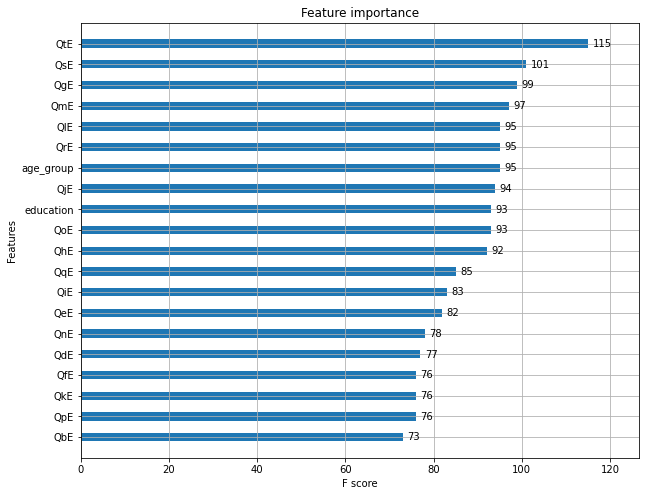

In [19]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_model, ax=ax, max_num_features=20, height=0.4)